<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/12_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 12 - Estimation and Confidence Interval

**Source**: https://www.britannica.com/science/statistics/Estimation-of-a-population-mean

The most fundamental point and interval estimation process involves the estimation of a population mean. Suppose it is of interest to estimate the population mean, μ, for a quantitative variable. Data collected from a simple random sample can be used to compute the sample mean, x̄, where the value of x̄ provides a point estimate of μ.

When the sample mean is used as a point estimate of the population mean, some error can be expected owing to the fact that a sample, or subset of the population, is used to compute the point estimate. The absolute value of the difference between the sample mean, x̄, and the population mean, μ, written |x̄ − μ|, is called the sampling error. Interval estimation incorporates a probability statement about the magnitude of the sampling error. The sampling distribution of x̄ provides the basis for such a statement.

Statisticians have shown that the mean of the sampling distribution of x̄ is equal to the population mean, μ, and that the standard deviation is given by σ/Square root of√n, where σ is the population standard deviation. The standard deviation of a sampling distribution is called the standard error. For large sample sizes, the central limit theorem indicates that the sampling distribution of x̄ can be approximated by a normal probability distribution. As a matter of practice, statisticians usually consider samples of size 30 or more to be large.

**Video to Watch**: https://www.youtube.com/watch?v=_BiVb6neUP0

*Figure 1*: Population Parameter vs Sample Statistics

![Point Estimate vs Interval Estimate](https://github.com/wcj365/python-stats-dataviz/blob/master/images/statistical_estimation.png?raw=1)

*Figure 2*. Sampling Distribution of Sample Means

![](https://github.com/wcj365/python-stats-dataviz/blob/master/images/statistical_estimation2.png?raw=1)

*Figure 3*. Interval Estimation

![](https://github.com/wcj365/python-stats-dataviz/blob/master/images/statistical_estimation3.png?raw=1)


**Figure Source**: https://www.youtube.com/watch?v=_BiVb6neUP0


In [0]:
# Import useful libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set global parameter to increase the plot size. Default size is too small
plt.rcParams["figure.figsize"] = (12,12)     

In [3]:
# load 2017-2018 college scorecard data
# Again, we only load the needed columns

DATA_URL = "https://raw.githubusercontent.com/wcj365/python-stats-dataviz/master/data/MERGED2017_18_PP_FEW_COLUMNS.csv"
col_names = ["STABBR", "INSTNM","CONTROL", "TUITIONFEE_IN"]
df = pd.read_csv(DATA_URL, usecols=col_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7115 non-null   object 
 1   STABBR         7115 non-null   object 
 2   CONTROL        7115 non-null   int64  
 3   TUITIONFEE_IN  4028 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.5+ KB


In [4]:
df.describe(include="all")

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
count,7115,7115,7115.000000,4028.000000
unique,6981,59,NaN,NaN
top,Stevens-Henager College,CA,NaN,NaN
freq,7,716,NaN,NaN
mean,NaN,NaN,2.129585,15081.399950
std,NaN,NaN,0.834534,12723.724262
min,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,1.000000,5246.250000
50%,NaN,NaN,2.000000,11296.000000
75%,NaN,NaN,3.000000,19400.000000


In [5]:
# CONTROL represents institution ownership types. 
# So it should be a categorical variable even the value are numbers
# convert it from integer type to string type

df["CONTROL"] = df["CONTROL"].astype(str)
df.describe(include="all")

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
count,7115,7115,7115,4028.000000
unique,6981,59,3,NaN
top,Stevens-Henager College,CA,3,NaN
freq,7,716,2998,NaN
mean,NaN,NaN,NaN,15081.399950
std,NaN,NaN,NaN,12723.724262
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,5246.250000
50%,NaN,NaN,NaN,11296.000000
75%,NaN,NaN,NaN,19400.000000


In [6]:
# Find out the colleges that have zero tuition

df[df["TUITIONFEE_IN"] == 0]

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
577,United States Air Force Academy,CO,1,0.0
629,United States Coast Guard Academy,CT,1,0.0
1500,United States Naval Academy,MD,1,0.0
2449,United States Military Academy,NY,1,0.0


In [7]:
# Drop the colleges with zero tuition

df = df[df["TUITIONFEE_IN"] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7111 entries, 0 to 7114
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7111 non-null   object 
 1   STABBR         7111 non-null   object 
 2   CONTROL        7111 non-null   object 
 3   TUITIONFEE_IN  4024 non-null   float64
dtypes: float64(1), object(3)
memory usage: 277.8+ KB


In [8]:
# Find out how many colleges having missing tuition

df["TUITIONFEE_IN"].isna().sum()

3087

In [21]:
# Drop these colleges with missing tuition from the dataframe

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 7114
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4024 non-null   object 
 1   STABBR         4024 non-null   object 
 2   CONTROL        4024 non-null   object 
 3   TUITIONFEE_IN  4024 non-null   float64
dtypes: float64(1), object(3)
memory usage: 157.2+ KB


In [22]:
df.describe(include="all")

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
count,4024,4024,4024,4024.000000
unique,3966,59,3,NaN
top,Stevens-Henager College,CA,Public,NaN
freq,7,316,1692,NaN
mean,NaN,NaN,NaN,15096.391402
std,NaN,NaN,NaN,12721.153785
min,NaN,NaN,NaN,480.000000
25%,NaN,NaN,NaN,5255.750000
50%,NaN,NaN,NaN,11315.000000
75%,NaN,NaN,NaN,19400.000000


Finally, we have a population of 4,024 colleges. 

We will now proceed to take a random sample of colleges and use the sample mean as an estimator for the population mean. Since the sample mean is only the approximation of the population mean, we would like to find out our confidence level and confidence interval of our estimate and the margin of errors.

The formula for calculating standard deviation of a sample is:

 √(∑(xi - x(bar))^2) /n-1)  

The term n-1 is called the degrees of freedom, meaning "number of independent variables - number of parameters estimated".
in this case the mean is being estimated.

The formula for calculating standard deviation of a population is:

√(∑((xi - µ )^2) /n) 

**The Standard Error (SE) = Standard Deviation / Square Root of Sample Size**

SE is used to measure the sampling error. So the small the sample size, the large the sampling error is.

In [23]:
# Random sample of colleges
SAMPLE_SIZE = 50   # This variable will be used through out the rest of cells

df_sample = df.sample(SAMPLE_SIZE)
sample_mean = df_sample["TUITIONFEE_IN"].mean()
sample_mean                   

14990.84

In [24]:
#### Let's calculate the sample standard deviation the hard way

tuition_list = list(df_sample["TUITIONFEE_IN"])
degree_of_freedom = SAMPLE_SIZE - 1
variance = 0
for tuition in tuition_list:
    variance += (tuition - sample_mean)**2
sample_std = math.sqrt(variance/degree_of_freedom)
round(sample_std, 2)

12091.53

In [25]:
#### Let's calculate the sample standard deviation easy way using Pandas

sample_std = df_sample["TUITIONFEE_IN"].std()
round(sample_std, 2)

12091.53

#### Let's calculate the sample standard deviation easy way using Numpy

Notes:

Delta Degrees of Freedom (DDOF): the divisor used in the calculation is N - ddof, where N represents the number of observations. By default, ddof is zero.

In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of a hypothetical infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables.


In [12]:
sample_std = np.std(df_sample["TUITIONFEE_IN"], ddof=1)
round(sample_std, 2)

14787.78

### Confidence Intervals 

We will use the following chracteristics of a normal distribution:

- 68% of values are within 1 standard deviation of the mean, 𝜇±𝜎
- 95% of values are within 2 standard deviations of the mean, 𝜇±2𝜎
- 99.7% of values are within 3 standard deviations of the mean, 𝜇±3𝜎 (This is where the famous 6 sigma came from)

In [13]:
# let's calculate the standard error first 
# Since we assume we don't know the population standard deviation, we use sample standard deviation as an estimate

std_err = sample_std / math.sqrt(SAMPLE_SIZE)       # standard error
std_err

2091.307565630774

In [14]:
# Calculate 68% Confidence Interval (CI) - one standard error from the population mean
# 68% chances the population mean is within the sample_mean (+ or -) the standard error (SE)

LCL_68 = sample_mean -  std_err
UCL_68 = sample_mean +  std_err

print("Lower confidence limit at 68% confidence level = ", round(LCL_68,2))
print("Upper confidence limit at 68% confidence level = ", round(UCL_68,2))

Lower confidence limit at 68% confidence level =  14469.34
Upper confidence limit at 68% confidence level =  18651.95


In [15]:
# Calculate 95% Confidence Interval (CI) - one standard error from the population mean
# 90% chances the population mean is within the sample_mean + or - 2 * the standard error (SE)

LCL_95 = sample_mean -  2 * std_err
UCL_95 = sample_mean +  2 * std_err
print("Lower confidence limit at 95% confidence level = ", round(LCL_95,2))
print("Upper confidence limit at 95% confidence level = ", round(UCL_95,2))


Lower confidence limit at 95% confidence level =  12378.03
Upper confidence limit at 95% confidence level =  20743.26


In [16]:
# Calculate 99.7% Confidence Interval (CI) - one standard error from the population mean
# 99.7% chances the population mean is within the sample_mean + or - 3 * the standard error (SE)

LCL_997 = sample_mean -  3 * std_err
UCL_997 = sample_mean +  3 * std_err
print("Lower confidence limit at 99.7% confidence level = ", round(LCL_997,2))
print("Upper confidence limit at 99.7% confidence level = ", round(UCL_997,2))

Lower confidence limit at 99.7% confidence level =  10286.72
Upper confidence limit at 99.7% confidence level =  22834.57


In [0]:
# Calculate population mean

df["TUITIONFEE_IN"].mean()

15096.391401590457

## Next, let's compare the tuition of different types of institutions using Boxplot

In [17]:
# Transform the cryptic numbers to explicit lables. 
# Notice here we don't use for loop. Instead, we use "apply" and 
# and pass a function as a parameter. This is called funcitonal programming
# style. 

def get_ownership(control):
    if control == "1":
        return "Public"
    elif control =="2":
        return "Private nonprofit"
    elif control =="3":
        return "Private for-profit"
    else: 
        return np.nan
    
df["CONTROL"] = df["CONTROL"].apply(get_ownership)
df.sample(10)

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
1761,Hamline University,MN,Private nonprofit,40332.0
2289,Hobart William Smith Colleges,NY,Private nonprofit,53525.0
5415,Argosy University-Salt Lake City,UT,Private for-profit,13438.0
4080,Bethel Seminary-San Diego,CA,Private nonprofit,NaN
4420,Central Susquehanna Intermediate Unit LPN Career,PA,Public,NaN
3730,Cornish College of the Arts,WA,Private nonprofit,40464.0
6263,Paul Mitchell the School-Ardmore,OK,Private for-profit,NaN
3853,Milwaukee Institute of Art & Design,WI,Private nonprofit,36230.0
5505,Woodland Community College,CA,Public,1124.0
1524,Boston Architectural College,MA,Private nonprofit,21174.0


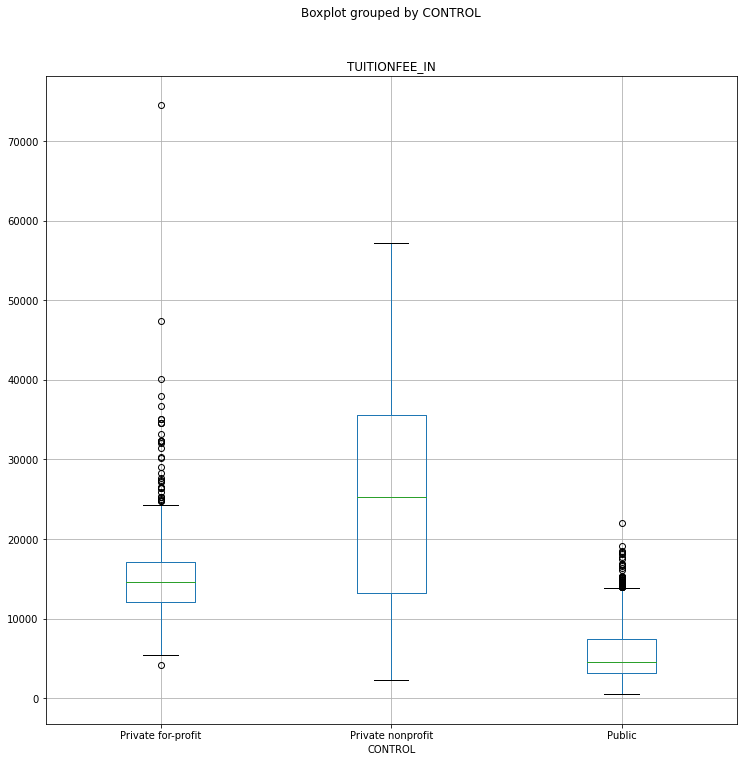

In [18]:
# Display the boxplot by different ownership types

df.boxplot("TUITIONFEE_IN",by="CONTROL")

**Question: Why pro-profit college charge lower tuition than nonprofit ones?**

### The End 